# Check augmentation with edges pipeline results

In [28]:
import os

os.chdir("/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder")

In [29]:
!pwd

/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder


In [30]:
import matplotlib.pyplot as plt

from scripts.training import augmentations as aug
from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
DATASET_PATH = os.path.join(os.getcwd(), "data", "dataset", "train")

In [32]:
def draw_sample(index):
    fig, axis = plt.subplots(8, 4, figsize=(10, 20))

    for i in range(8):
        img, edge = dataset[index]
        img2, edge2 = dataset[index]
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(edge)
        axis[i, 2].imshow(img2)
        axis[i, 3].imshow(edge2)

In [33]:
def draw_sample_without_edges(index):
    fig, axis = plt.subplots(8, 2, figsize=(10, 20))

    for i in range(8):
        img = dataset[index]
        img2 = dataset[index]
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(img2)

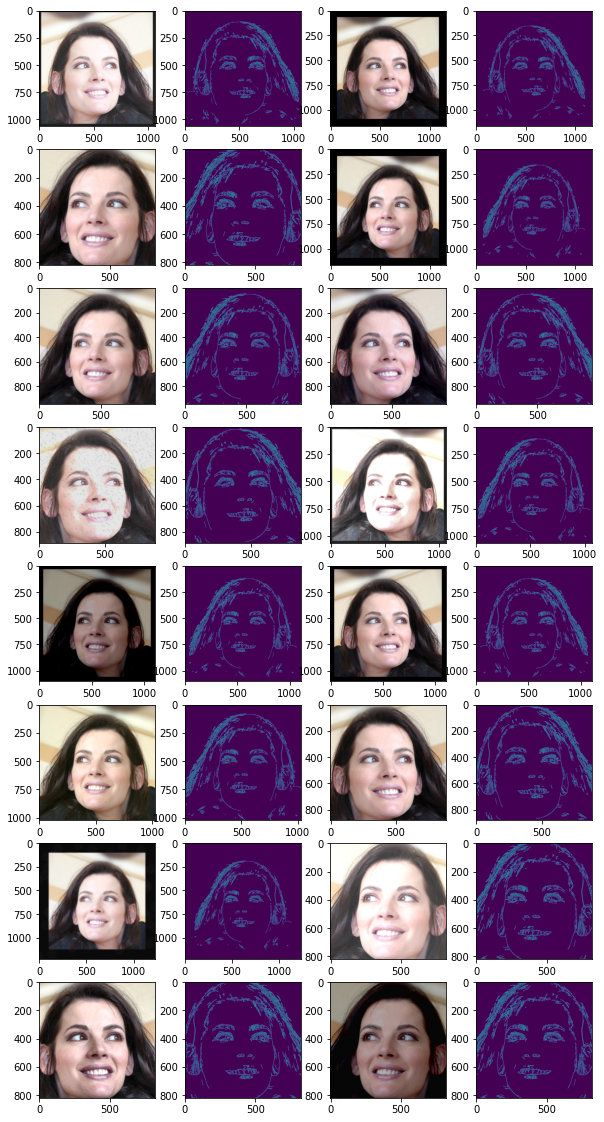

In [34]:
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=True, use_edges = True)
aug_pipeline = aug.AugmentationPipeline(use_edges = True)
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"], use_edges = True)
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"], resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"], use_edges = True)
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False, resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"], use_edges = True)
#aug_pipeline = aug.AugmentationPipelineWithEdges(use_all_augmentations=False)

dataset = dl.CelebAFaceAutoencoderDatasetWithEdges(
    dataset_root=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
)

draw_sample(48)


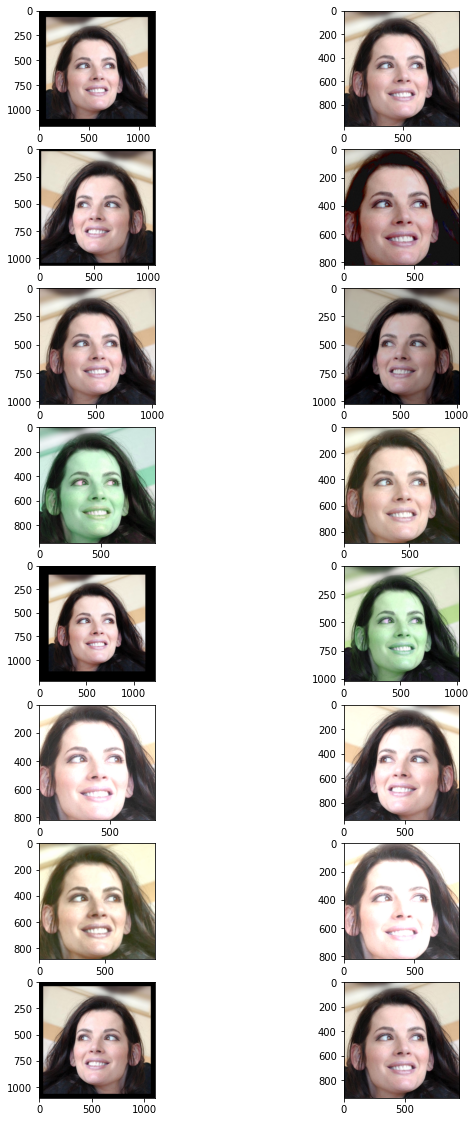

In [35]:
aug_pipeline = aug.AugmentationPipeline()

dataset = dl.CelebAFaceAutoencoderDataset(
    dataset_root=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
)

draw_sample_without_edges(48)